In [1]:
import pandas as pd

In [2]:
viirs_df = pd.read_csv('viirs_dataset.csv')

In [6]:
viirs_df.head()

,longitude,latitude,light_intensity,state,year,month
0,-44.925000,-20.8375,0.0,rio,2020,1
1,-44.920833,-20.8375,0.0,rio,2020,1
2,-44.916667,-20.8375,0.0,rio,2020,1
3,-44.912500,-20.8375,0.0,rio,2020,1
4,-44.908333,-20.8375,0.0,rio,2020,1


In [7]:
viirs_df.tail()

,longitude,latitude,light_intensity,state,year,month
25891516,-37.370833,-18.316667,0.0,bahia,2020,3
25891517,-37.366666,-18.316667,0.0,bahia,2020,3
25891518,-37.362500,-18.316667,0.0,bahia,2020,3
25891519,-37.358333,-18.316667,0.0,bahia,2020,3
25891520,-37.354166,-18.316667,0.0,bahia,2020,3


In [8]:
viirs_df.shape

(25891521, 6)

In [9]:
viirs_df.size

155349126

In [10]:
len(viirs_df)

25891521

In [11]:
viirs_df.columns

Index(['longitude', 'latitude', 'light_intensity', 'state', 'year', 'month'], dtype='object')

In [12]:
viirs_df.dtypes

longitude          float64
latitude           float64
light_intensity    float64
state               object
year                 int64
month                int64
dtype: object

In [13]:
viirs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25891521 entries, 0 to 25891520
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   longitude        float64
 1   latitude         float64
 2   light_intensity  float64
 3   state            object 
 4   year             int64  
 5   month            int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.2+ GB


In [14]:
viirs_df.describe()

,longitude,latitude,light_intensity,year,month
count,2.589152e+07,2.589152e+07,2.589152e+07,25891521.0,2.589152e+07
mean,-4.425124e+01,-1.704626e+01,4.662970e-01,2020.0,2.000000e+00
std,4.031518e+00,5.030462e+00,4.864524e+00,0.0,8.164966e-01
min,-5.313333e+01,-2.534167e+01,-8.900000e-01,2020.0,1.000000e+00
25%,-4.652083e+01,-2.184583e+01,0.000000e+00,2020.0,1.000000e+00
50%,-4.417500e+01,-1.666250e+01,0.000000e+00,2020.0,2.000000e+00
75%,-4.114583e+01,-1.261667e+01,3.300000e-01,2020.0,3.000000e+00
max,-3.735417e+01,-8.570833e+00,7.904140e+03,2020.0,3.000000e+00


<Axes: ylabel='Frequency'>

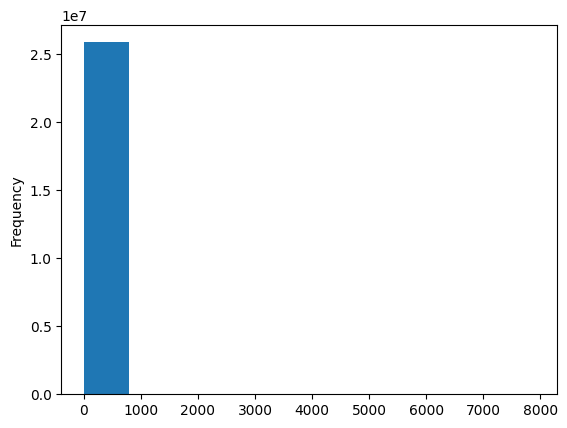

In [15]:
light = viirs_df['light_intensity']
light.plot.hist()

<Axes: ylabel='Frequency'>

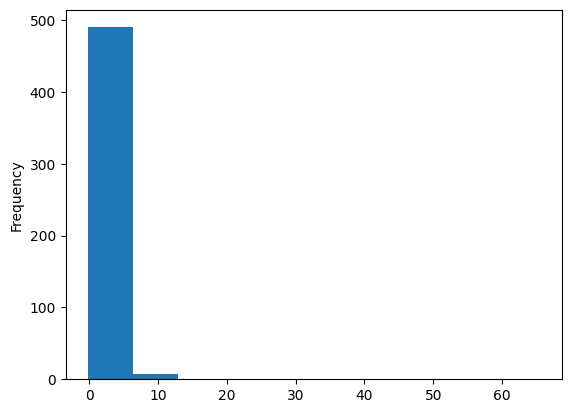

In [16]:
sample = light.sample(500)
sample.plot.hist()

In [17]:
viirs_df.isnull().sum()

longitude          0
latitude           0
light_intensity    0
state              0
year               0
month              0
dtype: int64

In [18]:
viirs_df.isna().sum()

longitude          0
latitude           0
light_intensity    0
state              0
year               0
month              0
dtype: int64

In [19]:
viirs_df.duplicated().sum()

0

In [20]:
# do not run this, no duplications found

# duplicated_rows = viirs_df[viirs_df.duplicated(keep=False)]

# sample_of_duplicates = duplicated_rows.sample(n=10, random_state=42)
# print(sample_of_duplicates)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'light_intensity'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

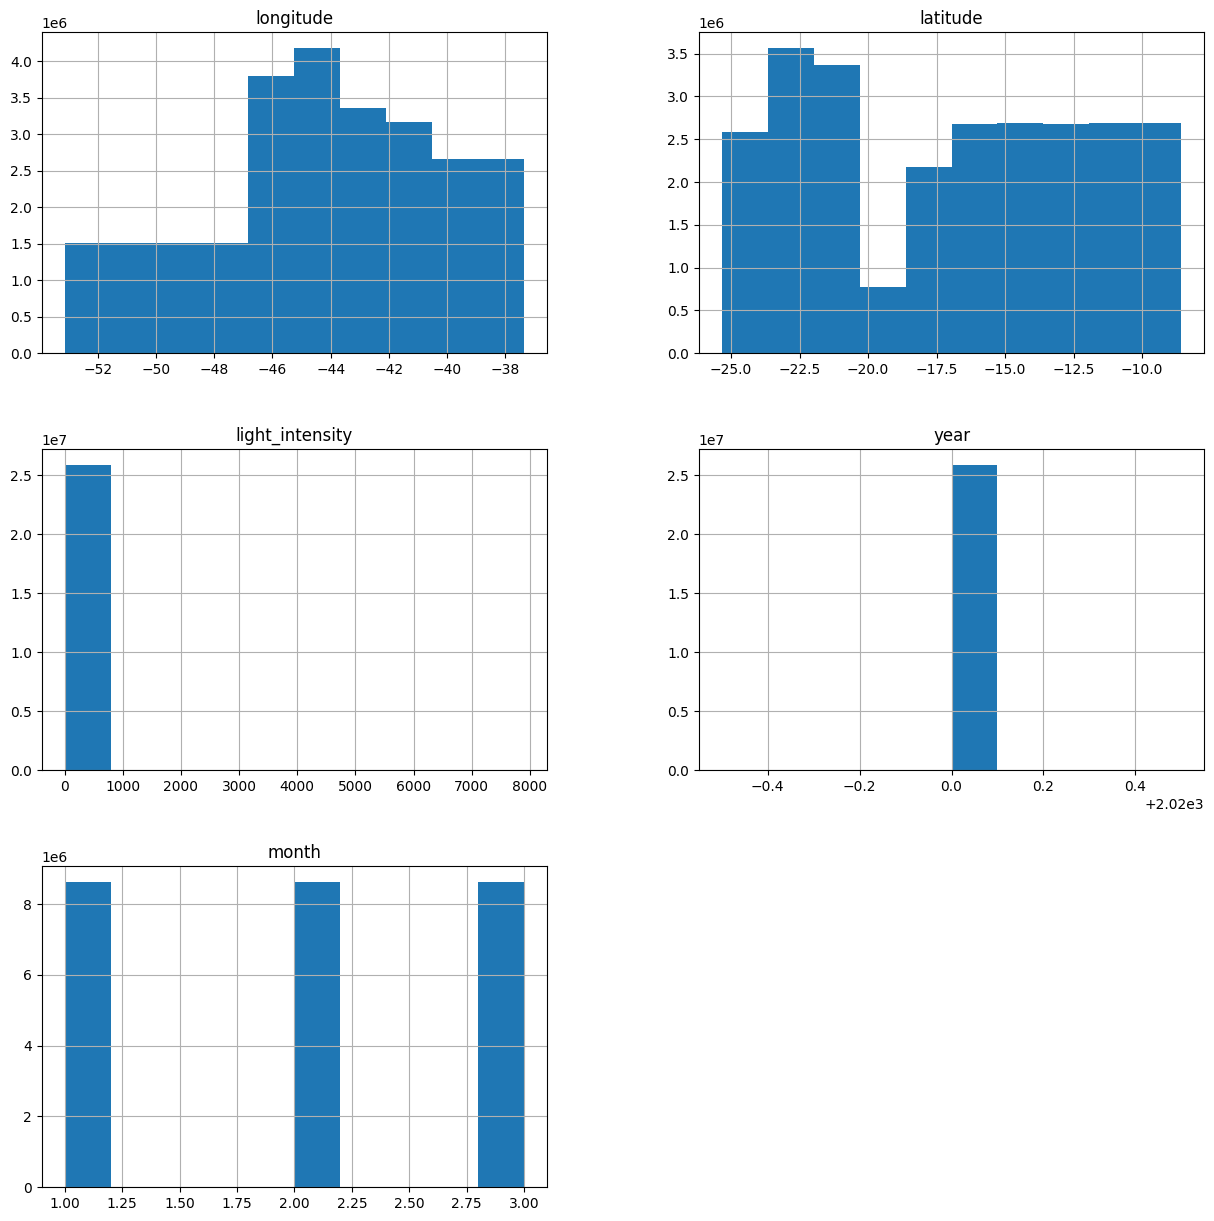

In [21]:
viirs_df.hist(figsize=(15,15))

C:\Users\PC\AppData\Local\Temp\ipykernel_18508\2705268478.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


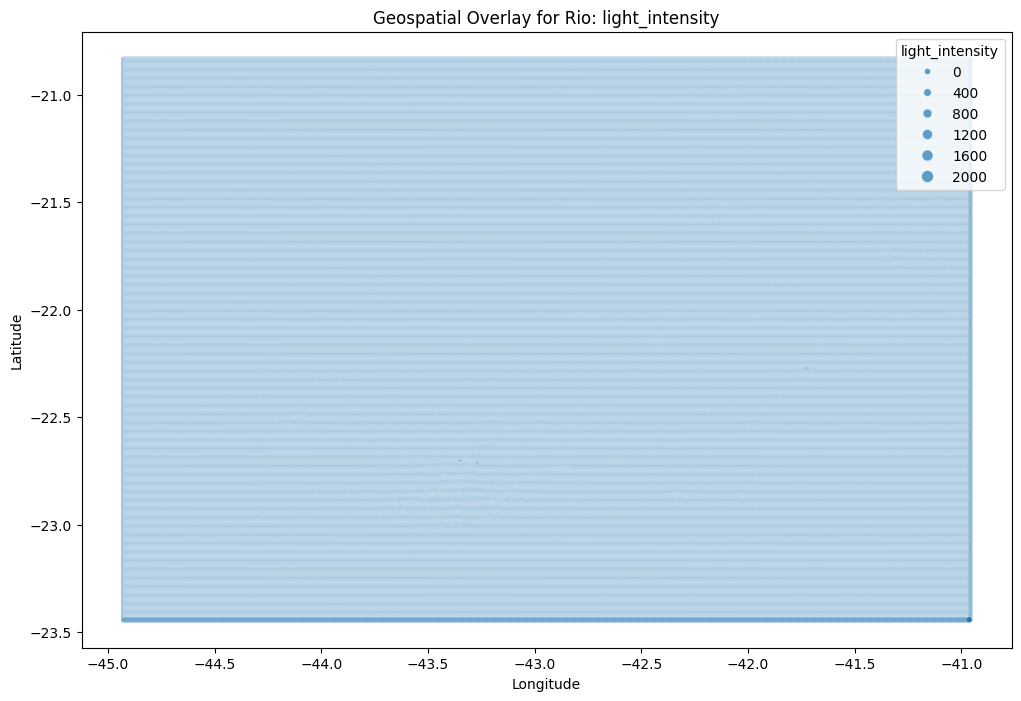

C:\Users\PC\AppData\Local\Temp\ipykernel_18508\2705268478.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


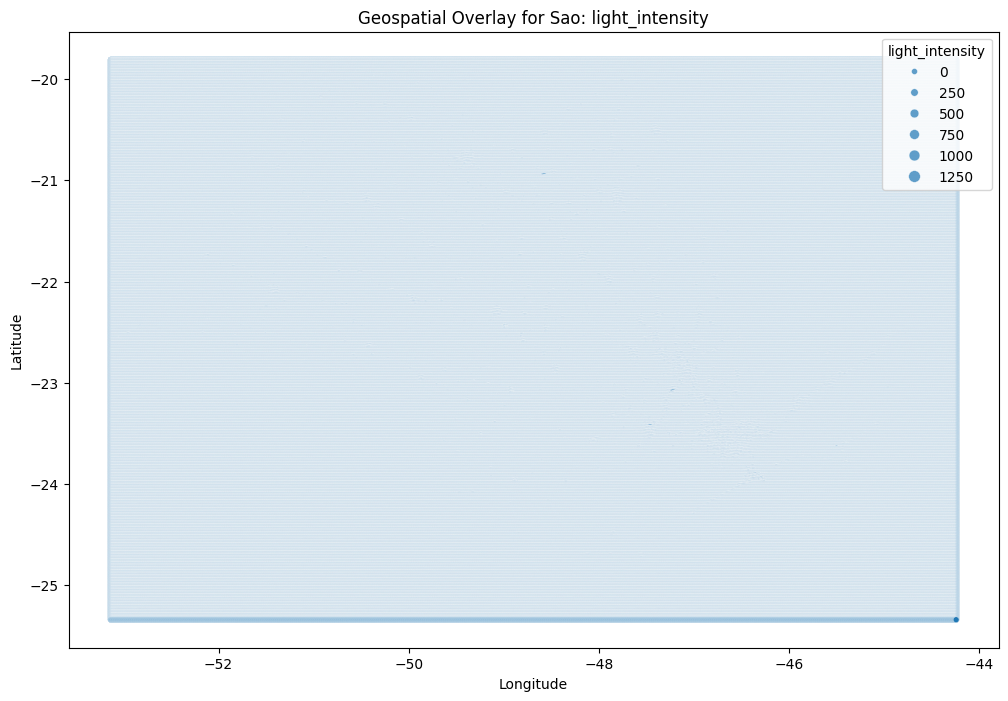

C:\Users\PC\AppData\Local\Temp\ipykernel_18508\2705268478.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


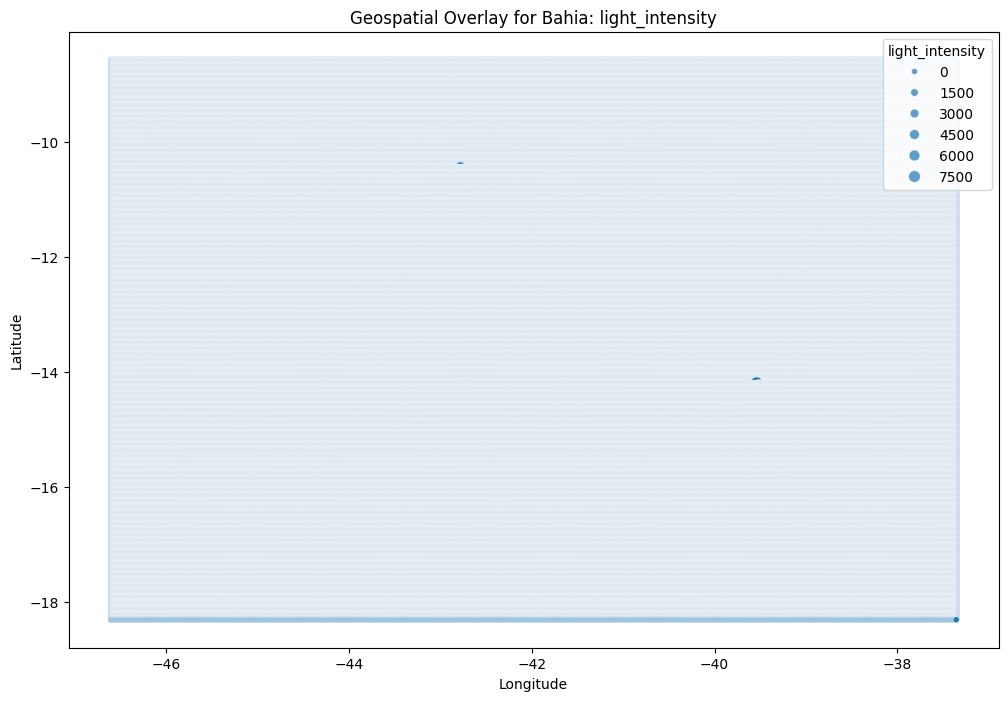

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

# Function to create individual plots for each city

def create_city_plot(city):
    city_df = viirs_df[viirs_df['state'] == city]
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=city_df,
        x='longitude',
        y='latitude',
        size='light_intensity',
        # hue='avg_d_kbps',
        palette='viridis',
        alpha=0.7
    )
    plt.title(f"Geospatial Overlay for {city.capitalize()}: light_intensity")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    # plt.legend(title="Average Download Speeds (kbps)")
    plt.show()

# Generate plots for each city
for city in viirs_df['state'].unique():
    create_city_plot(city)

In [4]:
zero_count = (viirs_df['light_intensity'] == 0).sum()

print(f"Number of zeroes in the column 'light_intensity': {zero_count}")

Number of zeroes in the column 'light_intensity': 13322289


In [5]:
neg_count = (viirs_df['light_intensity'] < 0).sum()

print(f"Number of negative values in the column 'light_intensity': {neg_count}")

Number of negative values in the column 'light_intensity': 274869


In [6]:
viirs_cleaned_df = viirs_df[viirs_df['light_intensity'] > 0]

viirs_cleaned_df.to_csv('viirs_cleaned_dataset.csv', index=False)

print("Cleaned dataset saved as 'viirs_cleaned_dataset.csv'")

Cleaned dataset saved as 'viirs_cleaned_dataset.csv'


C:\Users\PC\AppData\Local\Temp\ipykernel_10524\870355554.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


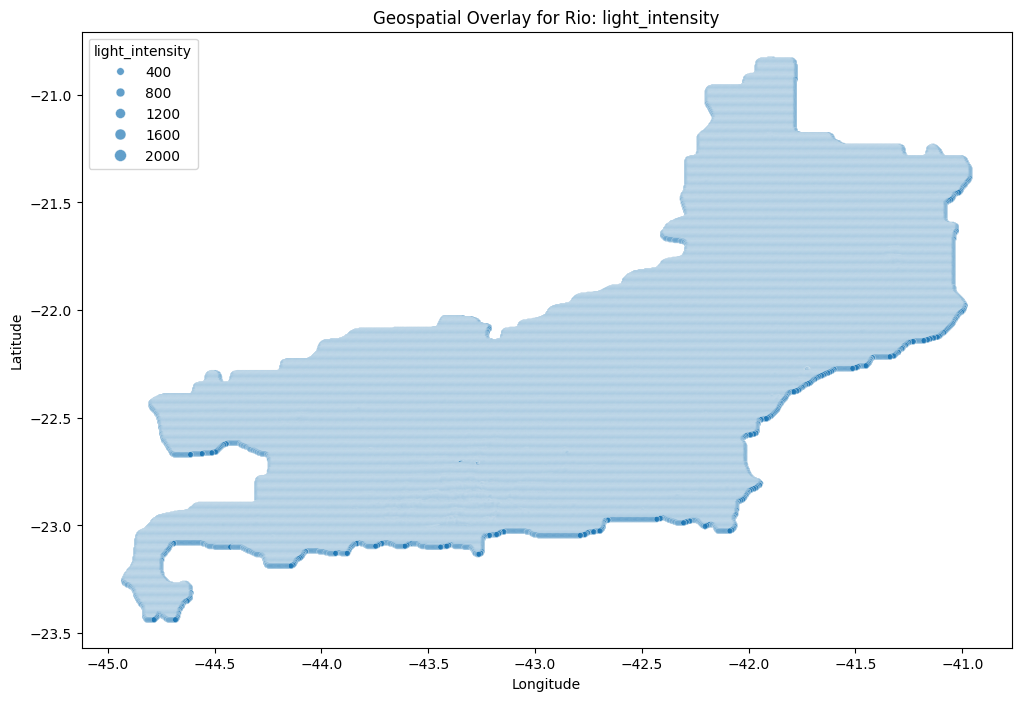

C:\Users\PC\AppData\Local\Temp\ipykernel_10524\870355554.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


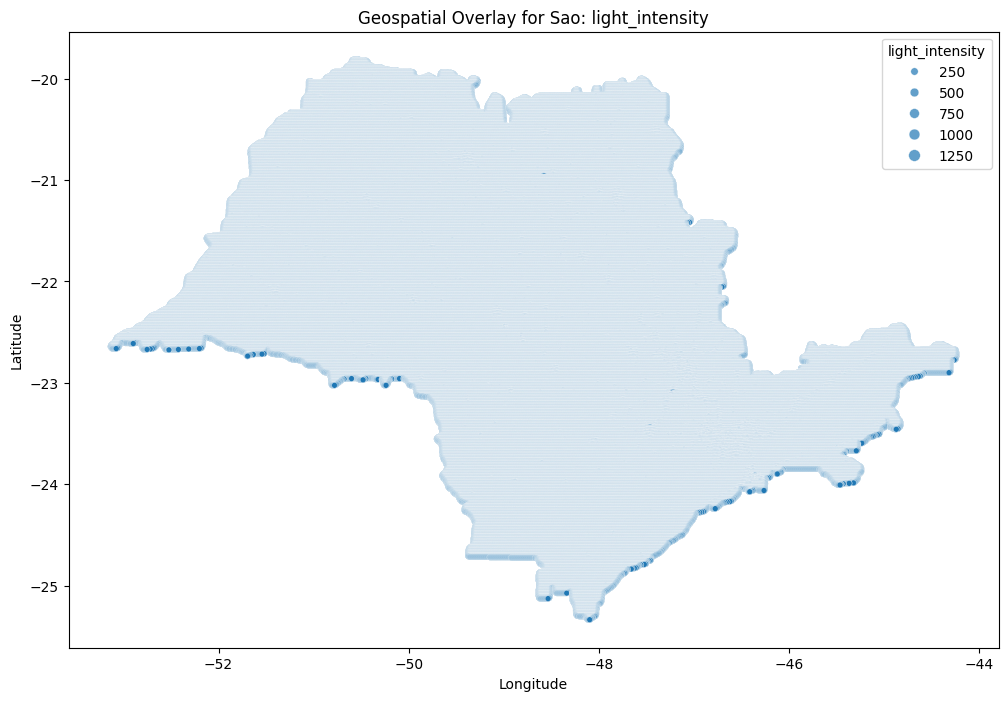

C:\Users\PC\AppData\Local\Temp\ipykernel_10524\870355554.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


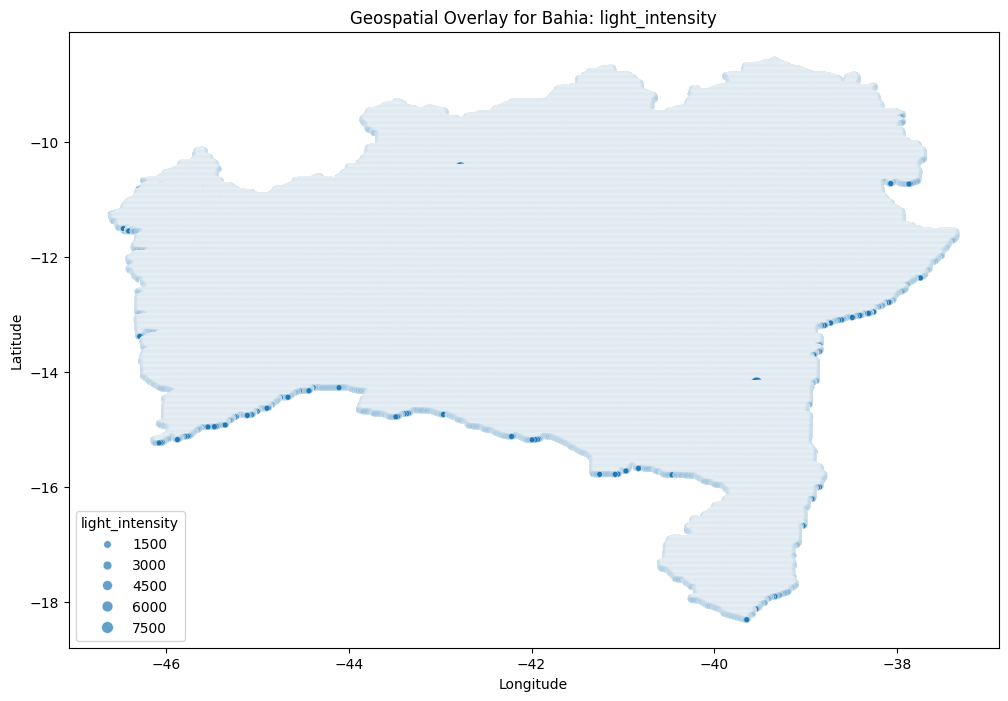

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

# Function to create individual plots for each city

def create_city_plot(city):
    city_df = viirs_cleaned_df[viirs_cleaned_df['state'] == city]
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=city_df,
        x='longitude',
        y='latitude',
        size='light_intensity',
        # hue='avg_d_kbps',
        palette='viridis',
        alpha=0.7
    )
    plt.title(f"Geospatial Overlay for {city.capitalize()}: light_intensity")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    # plt.legend(title="Average Download Speeds (kbps)")
    plt.show()

# Generate plots for each city
for city in viirs_cleaned_df['state'].unique():
    create_city_plot(city)

In [28]:
# # Step 1: Drop the 'state' column and check for duplicates
# duplicated_mask = viirs_cleaned_df.drop(columns=['state']).duplicated()

# # Step 2: Get the duplicated rows
# duplicated_rows = viirs_cleaned_df[duplicated_mask]

# # Step 3: Output the result
# print("Duplicated Rows (Ignoring 'state'):")
# print(duplicated_rows)

# # Step 4: Count of duplicates
# print(f"Number of duplicates: {duplicated_rows.shape[0]}")